![Semillero Astrofisica](../../logo.png)

---
# Ajuste de Funciones


Carlos Andrés del Valle (cdelv@unal.edu.co)

---

Este cuadernillo muestra cómo ajustar una función utilizando **DeepXDE**. Esto es algo que se hace comunmente a la hora de utilizar redes neuronales, de modo que este ejemplo es una buena introducción a la librería ya que es algo familiar. Además sirve como repaso de algunas cosas básicas de redes neuronales y machine learning.

In [2]:
import tensorflow as tf


ImportError: dlopen(/Users/eduard/miniforge3/envs/ashcat/lib/python3.10/site-packages/tensorflow/python/_pywrap_tfe.so, 0x0002): Library not loaded: @rpath/_pywrap_tensorflow_internal.so
  Referenced from: <8D026FA6-8C90-35B6-A92D-0886A4817B92> /Users/eduard/miniforge3/envs/ashcat/lib/python3.10/site-packages/tensorflow/python/_pywrap_tfe.so
  Reason: tried: '/Users/eduard/miniforge3/envs/ashcat/lib/python3.10/site-packages/tensorflow/python/../../_solib_darwin_arm64/_U_S_Stensorflow_Clibtensorflow_Uframework_Uimport_Ulib___Utensorflow/_pywrap_tensorflow_internal.so' (no such file), '/Users/eduard/miniforge3/envs/ashcat/lib/python3.10/site-packages/tensorflow/python/../../_solib_darwin_arm64/_U_S_Stensorflow_Spython_C_Upywrap_Utensorflow_Uinternal_Umacos___Utensorflow_Spython/_pywrap_tensorflow_internal.so' (no such file), '/Users/eduard/miniforge3/envs/ashcat/lib/python3.10/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so' (no such file), '/Users/eduard/miniforge3/envs/ashcat/lib/python3.10/site-packages/tensorflow/python/../_pywrap_tensorflow_internal.so' (no such file), '/Users/eduard/miniforge3/envs/ashcat/lib/python3.10/site-packages/tensorflow/python/../../../../_pywrap_tensorflow_internal.so' (no such file), '/Users/eduard/miniforge3/envs/ashcat/lib/python3.10/site-packages/tensorflow/python/../../_solib_darwin_arm64/_U_S_Stensorflow_Clibtensorflow_Uframework_Uimport_Ulib___Utensorflow/_pywrap_tensorflow_internal.so' (no such file), '/Users/eduard/miniforge3/envs/ashcat/lib/python3.10/site-packages/tensorflow/python/../../_solib_darwin_arm64/_U_S_Stensorflow_Spython_C_Upywrap_Utensorflow_Uinternal_Umacos___Utensorflow_Spython/_pywrap_tensorflow_internal.so' (no such file), '/Users/eduard/miniforge3/envs/ashcat/lib/python3.10/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so' (no such file), '/Users/eduard/miniforge3/envs/ashcat/lib/python3.10/site-packages/tensorflow/python/../_pywrap_tensorflow_internal.so' (no such file), '/Users/eduard/miniforge3/envs/ashcat/lib/python3.10/site-packages/tensorflow/python/../../../../_pywrap_tensorflow_internal.so' (no such file), '/Users/eduard/miniforge3/envs/ashcat/bin/../lib/_pywrap_tensorflow_internal.so' (no such file), '/Users/eduard/miniforge3/envs/ashcat/bin/../lib/_pywrap_tensorflow_internal.so' (no such file), '/usr/local/lib/_pywrap_tensorflow_internal.so' (no such file), '/usr/lib/_pywrap_tensorflow_internal.so' (no such file, not in dyld cache)

In [1]:
import deepxde as dde
import numpy as np

def func(x):
    return x*np.sin(5*x)

RuntimeError: Backend is set as tensorflow.compat.v1, but 'tensorflow.compat.v1' failed to import.

## 1. Definir la geometría del problema

La geometría del problema se refiere a la regíon en la que se va a entrenar la red neuronal

In [2]:
geom = dde.geometry.Interval(-1, 1)

## 2. Parametros del modelo de entrenamiento

Vamos a utilizar el modelo para funciones:

~~~python
class deepxde.data.function.Function(geometry, 
                                     function, 
                                     num_train, 
                                     num_test, 
                                     train_distribution='uniform', 
                                     online=False)
~~~
                                    
**train_distribution (string)**: The distribution to sample training points. One of the following: 
-    “uniform” (equispaced grid), 
-    “pseudo” (pseudorandom), 
-    “LHS” (Latin hypercube sampling), 
-    “Halton” (Halton sequence), 
-    “Hammersley” (Hammersley sequence), or 
-    “Sobol” (Sobol sequence).


**online (bool)**: If True, resample the pseudorandom training points every training step, otherwise, use the same training points.

In [3]:
num_train = 10
num_test = 1000
data = dde.data.Function(geom, func, num_train, num_test, train_distribution='uniform', online=False)

## 3. Definir la red Neuronal

Vamos a utilizar una **Fully-connected neural network**. Existe la **Parallel fully-connected neural network** que usa una sub red para cada salida. 

~~~python
class deepxde.nn.tensorflow.fnn.FNN(layer_sizes, activation, 
                                    kernel_initializer, 
                                    regularization=None, 
                                    dropout_rate=0)
~~~
Existen muchas funciones de activación, inicializadores y reguladores. Se pueden usar los que vienen hechos por defecto en el back-end que estamos utilizando, en este caso **TensorFlow**. Dejo donde revisar las diferentes opciones

- **Funciones de Activación:** https://www.tensorflow.org/api_docs/python/tf/keras/activations
- **Inicializadores:** https://www.tensorflow.org/api_docs/python/tf/keras/initializers
- **Reguladores:** https://www.tensorflow.org/api_docs/python/tf/keras/regularizers


In [4]:
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN([1] + [20] * 3 + [1], activation, initializer)

## 4. Compilar y entrenar el modelo

DeepXDE tiene una función que se encarga de compilar el modelo con el optimizador, learnign rate, métricas y estrategias de entrenamiento que queramos. Nuevamente, hay muchas opciones disponibles. 

~~~python
class deepxde.model.Model.compile(optimizer, 
                                  lr=None, 
                                  loss='MSE', 
                                  metrics=None, 
                                  decay=None, 
                                  loss_weights=None, 
                                  external_trainable_variables=None)
~~~

~~~python
class deepxde.model.Model.train(iterations=None, 
                                batch_size=None, 
                                display_every=1000, 
                                disregard_previous_best=False, 
                                callbacks=None, 
                                model_restore_path=None, 
                                model_save_path=None, 
                                epochs=None)
~~~

La descripción de los parámetros la pueden encontrar en https://deepxde.readthedocs.io/en/latest/modules/deepxde.html?highlight=deepxde.model#module-deepxde.model. 

In [5]:
model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=10000)

Compiling model...
Building feed-forward neural network...
'build' took 0.065634 s

'compile' took 0.159607 s

Initializing variables...


/home/wind/.local/lib/python3.10/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:103: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
2022-10-19 11:04:25.897839: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-19 11:04:25.995285: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


Training model...

Step      Train loss    Test loss     Test metric   
0         [2.90e-01]    [2.18e-01]    [1.04e+00]    
1000      [1.04e-05]    [6.71e-04]    [5.76e-02]    
2000      [8.77e-09]    [6.87e-04]    [5.83e-02]    
3000      [3.11e-08]    [6.88e-04]    [5.83e-02]    
4000      [3.92e-07]    [6.90e-04]    [5.84e-02]    
5000      [4.62e-08]    [6.84e-04]    [5.81e-02]    
6000      [1.45e-06]    [6.96e-04]    [5.86e-02]    
7000      [6.67e-10]    [6.84e-04]    [5.81e-02]    
8000      [5.92e-09]    [6.83e-04]    [5.81e-02]    
9000      [1.27e-08]    [6.84e-04]    [5.81e-02]    
10000     [3.65e-06]    [6.76e-04]    [5.78e-02]    

Best model at step 7000:
  train loss: 6.67e-10
  test loss: 6.84e-04
  test metric: [5.81e-02]

'train' took 3.057005 s



## 5. Visualizar los resultados

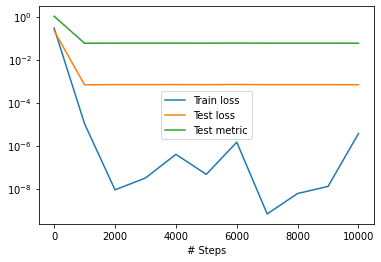

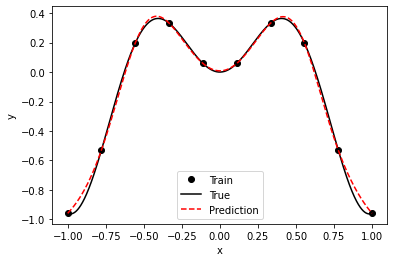

In [6]:
dde.saveplot(losshistory, train_state, issave=False, isplot=True)